<h1><center>Prodigy InfoTech ML Internship - Task 1</center></h1>
<h2><center>Predict House Prices using Linear Regression</center></h2>
<h2><center>Objective : Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.</center></h2>
<h3><center>Fares Yassen</center></h3>

# Importing the relevant libraries and exploring the data

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
sns.set()

In [19]:
raw_data = pd.read_csv("houses.csv")

# Taking a copy from the original dataset
df = raw_data.copy()

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Preprocessing 

In [22]:
# we don't need 'Id' in our analysis

df = df.drop(['Id'], axis = 1)

In [23]:
df.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [26]:
# Since we need to predict the prices of houses based on their square footage, no. of bedrooms and no. of bathrooms 

cols = ['LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'SalePrice']

df = df[cols]

df.describe()

,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,0.425342,0.057534,1.565068,0.382877,2.866438,180921.195890
std,9981.264932,0.518911,0.238753,0.550916,0.502885,0.815778,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,0.000000,0.000000,1.000000,0.000000,2.000000,129975.000000
50%,9478.500000,0.000000,0.000000,2.000000,0.000000,3.000000,163000.000000
75%,11601.500000,1.000000,0.000000,2.000000,1.000000,3.000000,214000.000000
max,215245.000000,3.000000,2.000000,3.000000,2.000000,8.000000,755000.000000


In [32]:
# Checking for missing values

if(df.isnull().sum().all() == 0):
    print('Our Data is clean')
else:
    print('Our Data contains missing values need to be cleaned')

Our Data is clean


## Data Visualization

### Exploring some PDFs

C:\Users\merof\AppData\Local\Temp\ipykernel_25924\3168171692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])
C:\Users\merof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

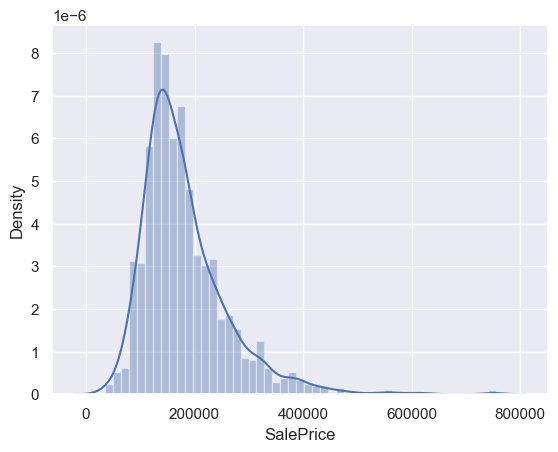

In [51]:
sns.distplot(df['SalePrice'])

C:\Users\merof\AppData\Local\Temp\ipykernel_25924\3476145701.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LotArea'])
C:\Users\merof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LotArea', ylabel='Density'>

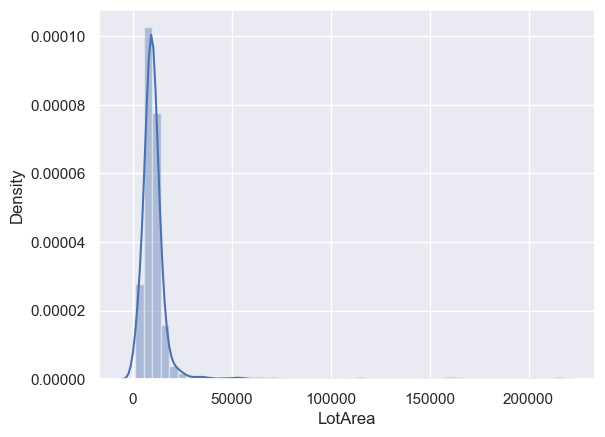

In [52]:
sns.distplot(df['LotArea'])

## Dealing with some Outliers

In [53]:
q = df['SalePrice'].quantile(0.99)

df_no_outliers = df[df['SalePrice'] < q]

In [56]:
q = df['LotArea'].quantile(0.99)

df_no_outliers = df_no_outliers[df_no_outliers['LotArea'] < q]

In [57]:
df_no_outliers.describe()

,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.00000,1431.000000
mean,9705.344514,0.415793,0.057303,1.553459,0.378057,2.86443,176206.867226
std,4154.918761,0.512503,0.238441,0.540435,0.502073,0.80891,68988.745972
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.00000,34900.000000
25%,7500.000000,0.000000,0.000000,1.000000,0.000000,2.00000,129500.000000
50%,9375.000000,0.000000,0.000000,2.000000,0.000000,3.00000,161000.000000
75%,11411.500000,1.000000,0.000000,2.000000,1.000000,3.00000,210000.000000
max,36500.000000,3.000000,2.000000,3.000000,2.000000,8.00000,440000.000000


C:\Users\merof\AppData\Local\Temp\ipykernel_25924\2427192119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outliers['SalePrice'])
C:\Users\merof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

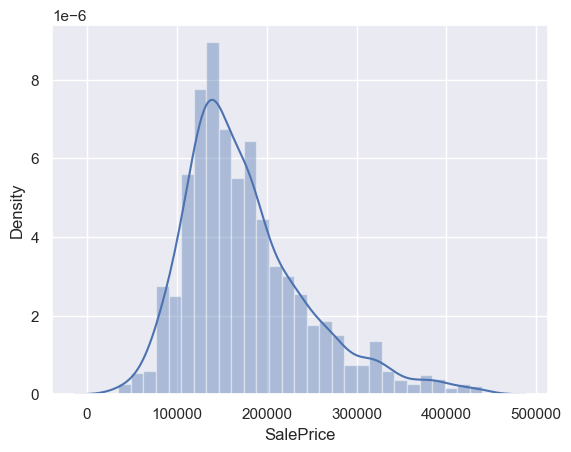

In [58]:
sns.distplot(df_no_outliers['SalePrice'])

C:\Users\merof\AppData\Local\Temp\ipykernel_25924\1322562184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outliers['LotArea'])
C:\Users\merof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LotArea', ylabel='Density'>

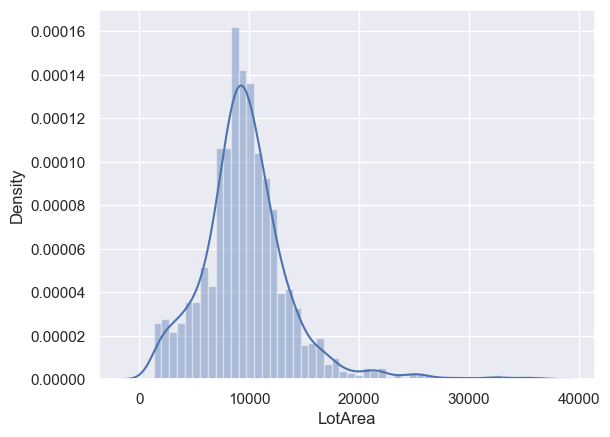

In [59]:
sns.distplot(df_no_outliers['LotArea'])

C:\Users\merof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\merof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\merof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\merof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

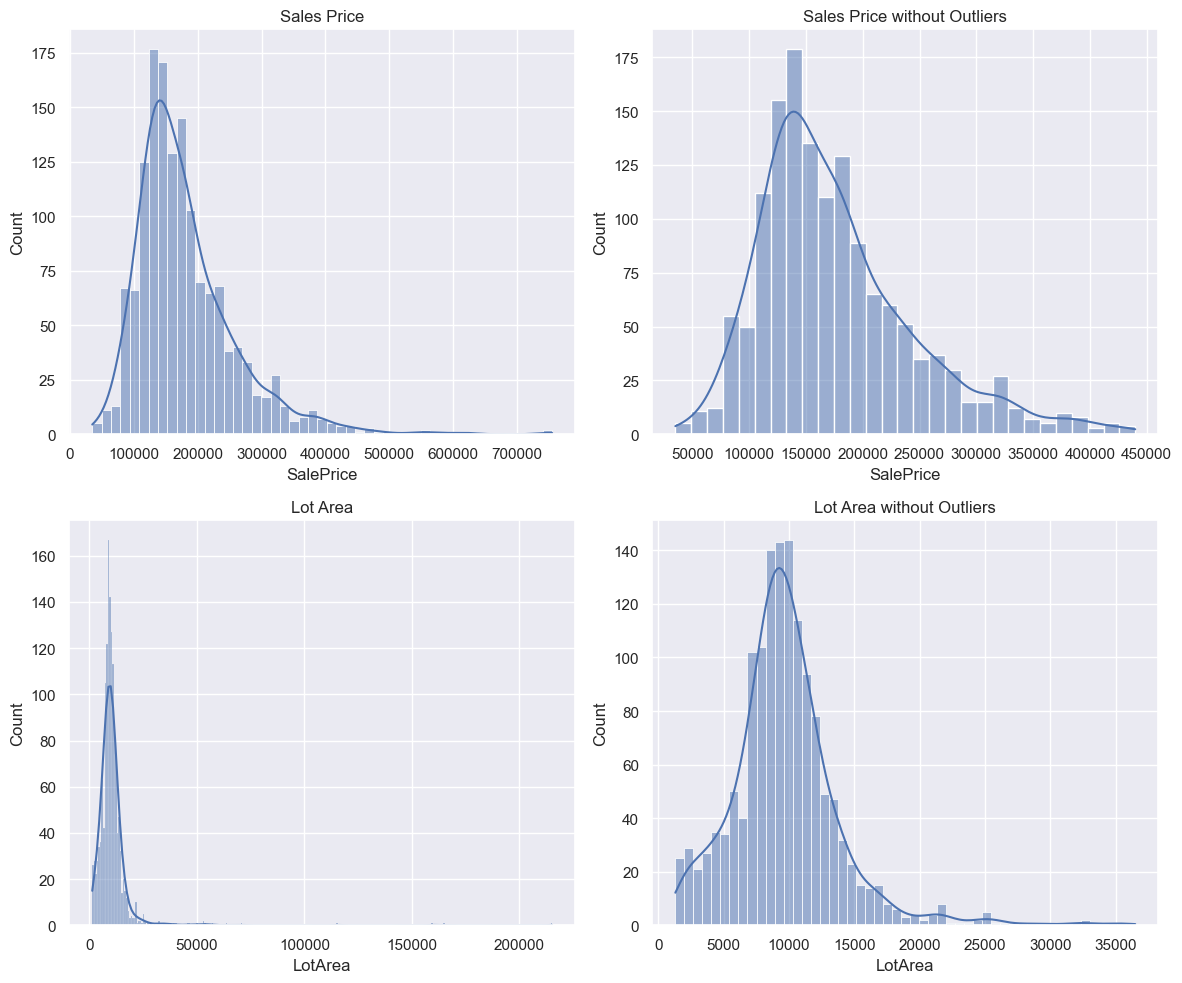

In [61]:
# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plotting original SalePrice
sns.histplot(df['SalePrice'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sales Price')

# Plotting SalePrice without outliers
sns.histplot(df_no_outliers['SalePrice'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Sales Price without Outliers')

# Plotting original LotArea
sns.histplot(df['LotArea'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Lot Area')

# Plotting LotArea without outliers
sns.histplot(df_no_outliers['LotArea'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Lot Area without Outliers')

plt.tight_layout()

plt.show()

## Checking the features correlation with target

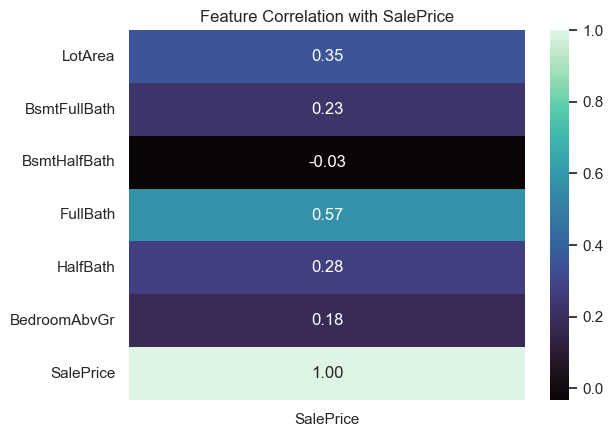

In [63]:
correlation_matrix = df_no_outliers.corr()

plt.figure()
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='mako', fmt=".2f")
plt.title("Feature Correlation with SalePrice")
plt.show()

In [65]:
# Since 'BsmtHalfBath' is too low correlated, we're gonna exclude it

df_preprocessed = df_no_outliers.drop(['BsmtHalfBath'], axis=1)

In [68]:
df_preprocessed

,LotArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,8450,1,2,1,3,208500
1,9600,0,2,0,3,181500
2,11250,1,2,1,3,223500
3,9550,1,1,0,3,140000
4,14260,1,2,1,4,250000
...,...,...,...,...,...,...
1455,7917,0,2,1,3,175000
1456,13175,1,2,0,3,210000
1457,9042,0,2,0,4,266500
1458,9717,1,1,0,2,142125


# Selecting the Targets and Inputs

In [69]:
inputs = df_preprocessed.iloc[:,:-1]

targets = df_preprocessed.iloc[:,-1]

# Scaling the data

In [72]:
scaler = StandardScaler()

# Fit the inputs(calculate the mean and std)
scaler.fit(inputs)

StandardScaler()

In [73]:
inputs_scaled = scaler.transform(inputs)

# Train Test Split

In [74]:
# I will split the variables with an 80-20 split and some random state

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

# Modeling (Creating the Regression)

In [75]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

## Evaluating the regression

In [76]:
outputs = reg.predict(x_train)

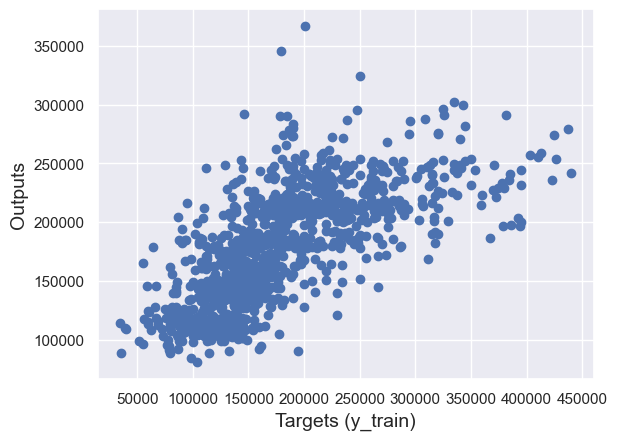

In [85]:
plt.scatter(y_train, outputs)

plt.xlabel('Targets (y_train)', size=14)
plt.ylabel('Outputs', size=14)

plt.show()

## Finding the Score, Intercept and coefficients

In [86]:
reg.score(x_train, y_train)

0.48033786309125137

In [87]:
reg.intercept_

176705.5672392299

In [88]:
reg.coef_

array([17018.0599769 , 15521.9662099 , 36896.81137627, 15348.0016122 ,
       -6337.41466255])

## Creating a Summary Table

In [95]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
# Difference between training targets and training predicted outputs 
reg_summary['Difference'] = y_train - outputs
reg_summary

,Features,Weights,Difference
0,LotArea,17018.059977,-29215.387039
1,BsmtFullBath,15521.966210,-50.204538
2,FullBath,36896.811376,-25687.867923
3,HalfBath,15348.001612,-3346.228433
4,BedroomAbvGr,-6337.414663,-3683.534161


# Testing the model

In [96]:
test_outputs = reg.predict(x_test)

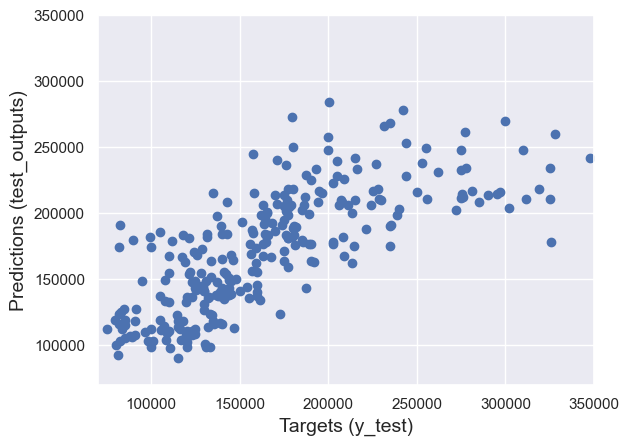

In [125]:
plt.scatter(y_test, test_outputs)
plt.xlabel('Targets (y_test)', size=14)
plt.ylabel('Predictions (test_outputs)', size=14)

plt.xlim(70000,350000)
plt.ylim(70000,350000)

plt.show()

In [138]:
# Reset the indexing and drop the old
y_test = y_test.reset_index(drop=True)

# Final Results

In [152]:
# Making a final summary table for the test
test_summary = pd.DataFrame(test_outputs, columns=['Prediction'])
test_summary['Target'] = y_test
test_summary['Residual'] = test_summary['Target'] - test_summary['Prediction']
test_summary['Difference %'] = np.absolute(test_summary['Residual']/test_summary['Target']*100)

#some format specifying
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
test_summary.sort_values(by=['Difference %'], inplace=True)

test_summary.head(10)

,Prediction,Target,Residual,Difference %
24,206086.60,205950,-136.60,0.07
37,109127.93,109008,-119.93,0.11
46,143526.56,144000,473.44,0.33
136,156460.22,157000,539.78,0.34
251,137290.40,138000,709.60,0.51
183,118632.79,118000,-632.79,0.54
254,166949.34,167900,950.66,0.57
41,208815.41,207500,-1315.41,0.63
8,137716.52,139000,1283.48,0.92
179,140338.80,139000,-1338.80,0.96
